In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# data import and preliminary analysis

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
# basic analysis 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [15]:
# chech whether column contains null value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

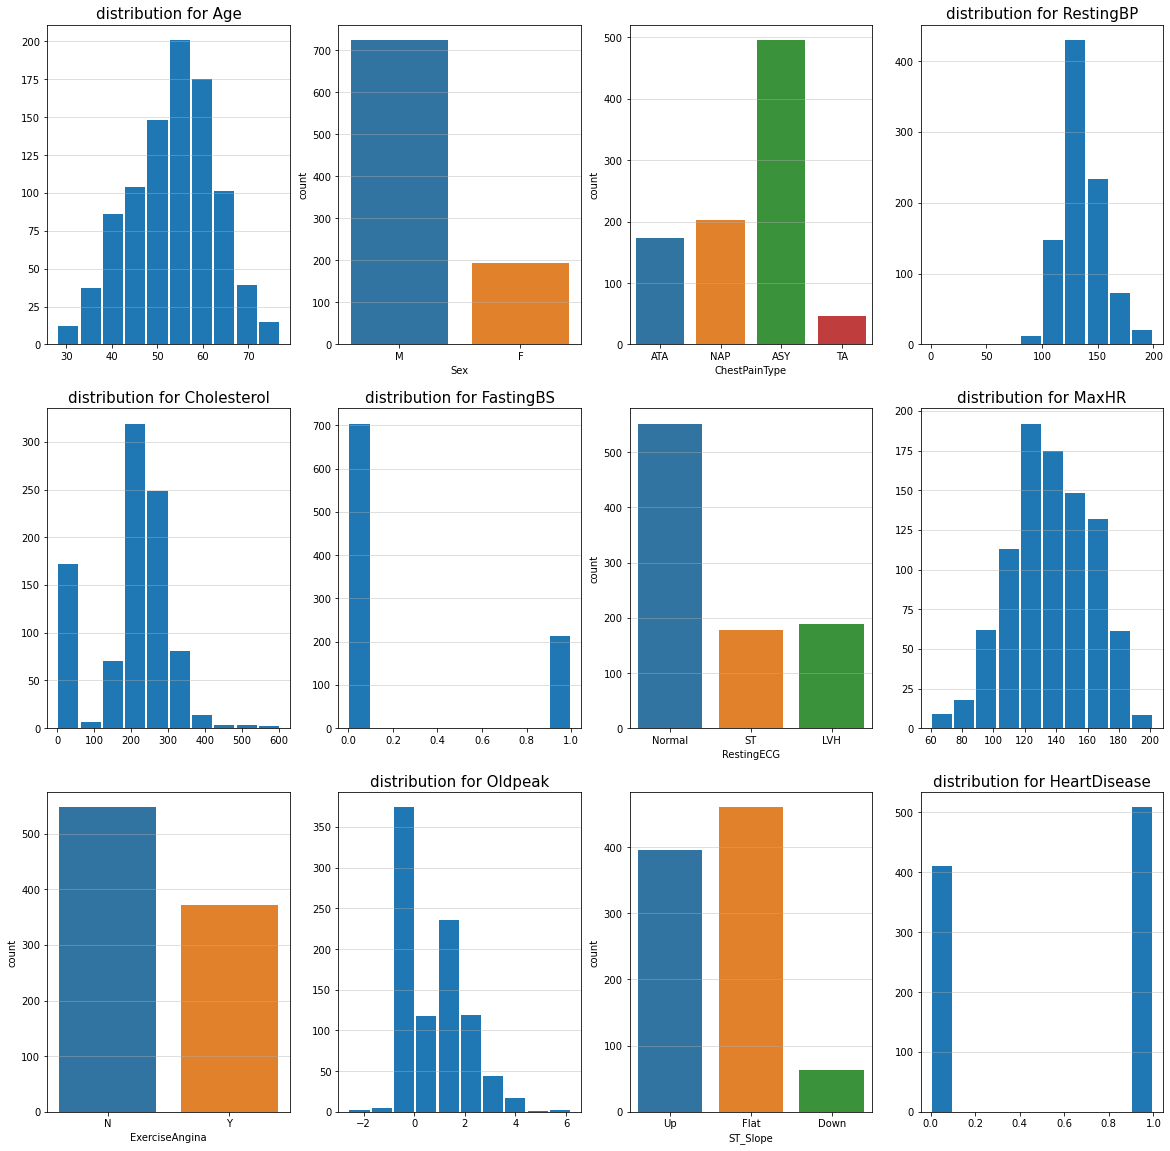

In [72]:
# visualization of each columns
a,b,c = 3,4,1
fig = plt.figure(figsize=(20,20))
for col in df.columns:
    plt.subplot(a, b, c)
    if col in df.describe().columns:
        plt.hist(x = col, data = df, rwidth=.9)
        plt.grid(axis='y', alpha=.5)
        plt.title(f'distribution for {col}', fontsize= 15)
        plt
    else:
        sns.countplot(x = col, data = df)
        plt.grid(axis='y', alpha=.5)
    c += 1

plt.show()

<AxesSubplot:>

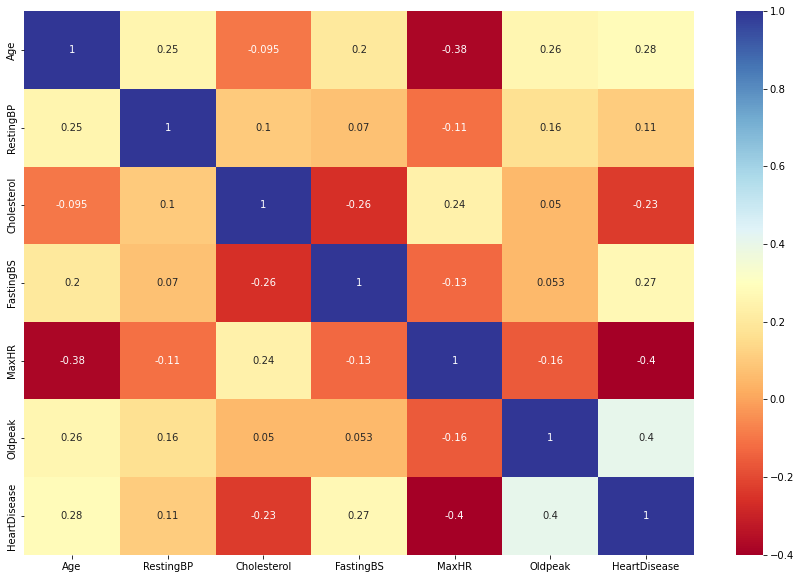

In [74]:
# correlation between columns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

# building desicion tree

In [231]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [233]:
# data transformation
encoder = LabelEncoder()
for i in df.columns:
    if i not in df.describe().columns:
        df[i] = encoder.fit_transform(df[i])
        Sex = {index : label for index, label in enumerate(encoder.classes_)}

x = df.iloc[:,:df.shape[1]-1]
y = df[['HeartDisease']]
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=361)
x_train.shape, x_test.shape

((734, 11), (184, 11))

In [291]:
# simple Decision Tree
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
print(f'Decision Tree Model Train Score is : {DT.score(x_train, y_train)}',
      f'Decision Tree Model test Score is : {DT.score(x_test, y_test)}',
      f'DecisionTreeClassifierModel feature importances are : {DT.feature_importances_}', sep = '\n\n')

Decision Tree Model Train Score is : 1.0

Decision Tree Model test Score is : 0.7880434782608695

DecisionTreeClassifierModel feature importances are : [0.06243811 0.04597983 0.10073956 0.0810193  0.10521155 0.0197474
 0.00782271 0.08399171 0.01401514 0.08907954 0.38995514]


In [299]:
# Tuned Decision Tree
param_dist = {"max_depth": np.arange(1, 11),
              "max_features": np.arange(1, 11),
              "min_samples_leaf": np.arange(1, 11),
              "criterion": ["gini", "entropy"]}
DT_modified = RandomizedSearchCV(DT, param_dist, cv=10,random_state=361)
DT_modified.fit(x_train,y_train)

print(DT_modified.best_params_,
      f'Decision Tree Model Train Score is : {DT_modified.score(x_train, y_train)}',
      f'Decision Tree Model test Score is : {DT_modified.score(x_test, y_test)}', sep = '\n\n')

{'min_samples_leaf': 10, 'max_features': 9, 'max_depth': 4, 'criterion': 'entropy'}

Decision Tree Model Train Score is : 0.8637602179836512

Decision Tree Model test Score is : 0.8641304347826086


# Model Evaluation

In [359]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_curve
from sklearn import tree

In [318]:
DT_pred = DT.predict(x_test)
DT_modified_pred = DT_modified.predict(x_test)

print(f'accuracy score for decision tree {accuracy_score(y_test, DT_pred)}',
      classification_report(y_test, DT_pred),
      f'accuracy score for tuned decision tree {accuracy_score(y_test, DT_modified_pred)}',
      classification_report(y_test, DT_modified_pred), sep = '\n\n')

accuracy score for decision tree 0.7880434782608695

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        85
           1       0.80      0.81      0.80        99

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184


accuracy score for tuned decision tree 0.8641304347826086

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        85
           1       0.85      0.91      0.88        99

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



comfusion matrix for decision tree: 
 [[65 20]
 [19 80]]


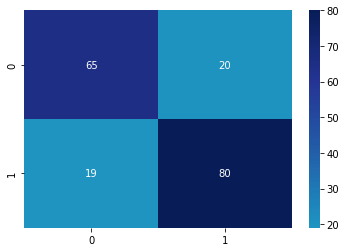


 comfusion matrix for decision tree: 
 [[69 16]
 [ 9 90]]


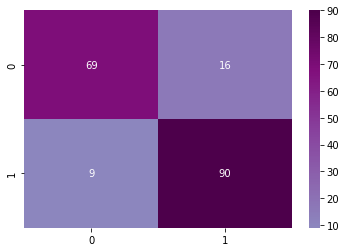

In [331]:
confusion_matrix_DT = confusion_matrix(y_test, DT_pred)
confusion_matrix_DT_modified = confusion_matrix(y_test, DT_modified_pred)

print(f'comfusion matrix for decision tree: \n {confusion_matrix_DT}')
sns.heatmap(confusion_matrix_DT, center = True, annot=True, cmap="YlGnBu")
plt.show()

print(f'\n comfusion matrix for decision tree: \n {confusion_matrix_DT_modified}')
sns.heatmap(confusion_matrix_DT_modified, center = True, annot=True, cmap="BuPu")
plt.show()

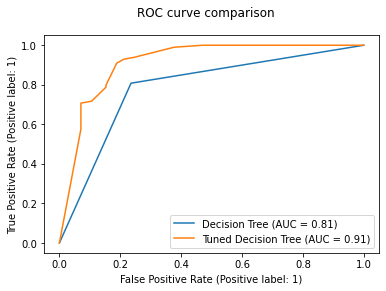

In [356]:
fig = plot_roc_curve(DT, x_test, y_test)
fig = plot_roc_curve(DT_modified, x_test, y_test, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
L=plt.legend()
L.get_texts()[0].set_text(f'Decision Tree (AUC = {round(roc_curve(y_test, DT_pred)[1][1],2)})')
L.get_texts()[1].set_text(f'Tuned Decision Tree (AUC = {round(roc_curve(y_test, DT_modified_pred)[1][1],2)})')
plt.show() 

[Text(607.8214285714286, 978.48, 'X[10] <= 1.5\nentropy = 0.991\nsamples = 734\nvalue = [325, 409]'),
 Text(318.85714285714283, 761.0400000000001, 'X[2] <= 0.5\nentropy = 0.689\nsamples = 424\nvalue = [78, 346]'),
 Text(159.42857142857142, 543.6, 'X[5] <= 0.5\nentropy = 0.394\nsamples = 296\nvalue = [23, 273]'),
 Text(79.71428571428571, 326.1600000000001, 'X[1] <= 0.5\nentropy = 0.478\nsamples = 204\nvalue = [21, 183]'),
 Text(39.857142857142854, 108.72000000000003, 'entropy = 0.94\nsamples = 28\nvalue = [10, 18]'),
 Text(119.57142857142856, 108.72000000000003, 'entropy = 0.337\nsamples = 176\nvalue = [11, 165]'),
 Text(239.1428571428571, 326.1600000000001, 'X[10] <= 0.5\nentropy = 0.151\nsamples = 92\nvalue = [2, 90]'),
 Text(199.28571428571428, 108.72000000000003, 'entropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(279.0, 108.72000000000003, 'entropy = 0.0\nsamples = 76\nvalue = [0, 76]'),
 Text(478.2857142857142, 543.6, 'X[1] <= 0.5\nentropy = 0.986\nsamples = 128\nvalue = [55,

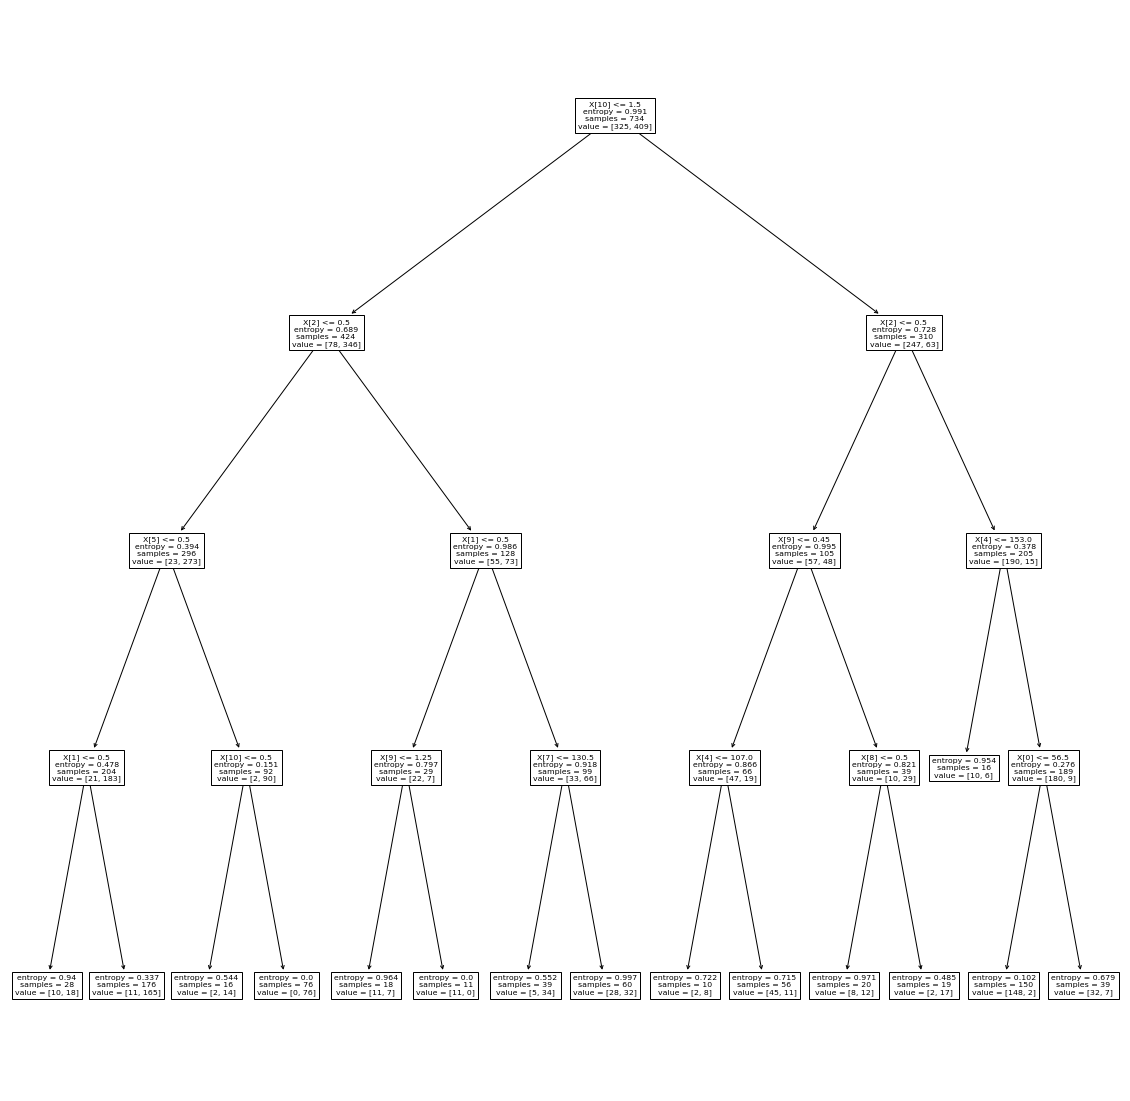

In [404]:
# final tree
best_params_dict = model.best_params_
final_tree = DecisionTreeClassifier(criterion = best_params_dict['criterion'],
                                    max_features = best_params_dict['max_features'],
                                    max_depth = best_params_dict['max_depth'],
                                    min_samples_leaf = best_params_dict['min_samples_leaf'],
                                    random_state = 361)
final_tree.fit(x_train,y_train)
plt.figure(figsize=(20, 20))
tree.plot_tree(final_tree)

In [24]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
def s():
    text_data = np.array(['Tim is smart!',
                          'Joy is the best',
                          'Lisa is dumb',
                          'Fred is lazy',
                          'Lisa is lazy'])
    # Create target vector
    y = np.array([1,1,0,0,0])
    # Create bag of words
    count = CountVectorizer()
    bag_of_words = count.fit_transform(text_data)    # 

    # Create feature matrix
    X = bag_of_words.toarray()

    mnb = MultinomialNB(alpha = 1, fit_prior = True, class_prior = None)
    mnb.fit(X,y)

    dfs = pd.DataFrame(bag_of_words.toarray(), columns = count.get_feature_names_out())
    dfs['Class'] = y

    lsts = []
    for i in dfs.columns:
        fff = dfs.groupby('Class')[i].value_counts().unstack()
        fff1 = fff.iloc[:,1:]
        fff2 = fff1[1:]
        lsts.append(np.sum(fff2,axis = 1))
    print(np.sum(lsts))
s()


NameError: name 'pd' is not defined